In [2]:
import pandas as pd
import os 

In [17]:
data_path = os.path.abspath("/home/alisher/Desktop/prep/MRI-image-preprocessing/missing.xlsx")
names = [ "flair", "t1", "t1ce", "t2"]

In [4]:
data = pd.read_excel(data_path)

In [5]:
data.shape

(69, 2)

In [6]:
data.modalities


AttributeError: 'DataFrame' object has no attribute 'modalities'

In [7]:
data.Modalities

0     [1, 1, 0, 1]
1     [1, 1, 0, 1]
2     [1, 1, 1, 1]
3     [1, 1, 0, 1]
4     [1, 1, 1, 1]
          ...     
64    [0, 0, 1, 0]
65    [1, 1, 1, 1]
66    [1, 1, 1, 1]
67    [1, 1, 1, 1]
68    [1, 1, 0, 1]
Name: Modalities, Length: 69, dtype: object

In [8]:
data.top()

AttributeError: 'DataFrame' object has no attribute 'top'

In [9]:
data.top

AttributeError: 'DataFrame' object has no attribute 'top'

In [13]:
row_size = data.shape[0]
col_size = data.shape[1]

In [19]:
for name in names: 
    data[name] = [0]*row_size

In [20]:
data.head

<bound method NDFrame.head of     Unnamed: 0    Modalities  flair  t1  t1ce  t2
0           43  [1, 1, 0, 1]      0   0     0   0
1           12  [1, 1, 0, 1]      0   0     0   0
2           40  [1, 1, 1, 1]      0   0     0   0
3           69  [1, 1, 0, 1]      0   0     0   0
4           47  [1, 1, 1, 1]      0   0     0   0
..         ...           ...    ...  ..   ...  ..
64           3  [0, 0, 1, 0]      0   0     0   0
65          39  [1, 1, 1, 1]      0   0     0   0
66           8  [1, 1, 1, 1]      0   0     0   0
67          18  [1, 1, 1, 1]      0   0     0   0
68          57  [1, 1, 0, 1]      0   0     0   0

[69 rows x 6 columns]>

In [22]:
data.drop('Unnamed: 0', 1, inplace = True)

In [23]:
data.head

<bound method NDFrame.head of       Modalities  flair  t1  t1ce  t2
0   [1, 1, 0, 1]      0   0     0   0
1   [1, 1, 0, 1]      0   0     0   0
2   [1, 1, 1, 1]      0   0     0   0
3   [1, 1, 0, 1]      0   0     0   0
4   [1, 1, 1, 1]      0   0     0   0
..           ...    ...  ..   ...  ..
64  [0, 0, 1, 0]      0   0     0   0
65  [1, 1, 1, 1]      0   0     0   0
66  [1, 1, 1, 1]      0   0     0   0
67  [1, 1, 1, 1]      0   0     0   0
68  [1, 1, 0, 1]      0   0     0   0

[69 rows x 5 columns]>

In [67]:
def decode(name):
    result = []
    for elem in name: 
        if elem.isdigit(): 
            result.append(int(elem))
    return result
    
def assign_modality(row):
    decoded = decode(row.Modalities)
    for (index, name) in enumerate(names):
        row[name] = decoded[index]
    return row

data = data.apply(assign_modality, axis = 'columns')

In [68]:
data_clean = data.drop('Modalities', 1)

In [69]:
data_clean.head()

,flair,t1,t1ce,t2
0,1,1,0,1
1,1,1,0,1
2,1,1,1,1
3,1,1,0,1
4,1,1,1,1


In [54]:
data_clean.flair

0     1
1     1
2     1
3     1
4     1
     ..
64    0
65    1
66    1
67    1
68    1
Name: flair, Length: 69, dtype: int64

In [56]:
data_clean[data_clean["t1ce"] == 0]

,flair,t1,t1ce,t2
0,1,1,0,1
1,1,1,0,1
3,1,1,0,1
8,1,1,0,1
11,1,1,0,1
26,0,0,0,1
32,1,1,0,1
34,1,1,0,1
36,1,1,0,1
42,1,1,0,1


In [57]:
data_clean.index

RangeIndex(start=0, stop=69, step=1)

In [70]:
was_done = False

In [71]:
if not was_done:
    data_clean = data_clean.reset_index()

In [101]:
only_flair_t1_t2 = data_clean[(data_clean["t1ce"] == 0) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

index    14
flair    14
t1       14
t1ce     14
t2       14
dtype: int64

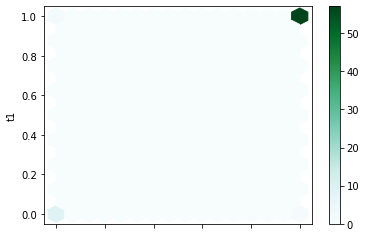

In [115]:
data_clean.plot.hexbin(x = "t2", y  = "t1", gridsize = 15)

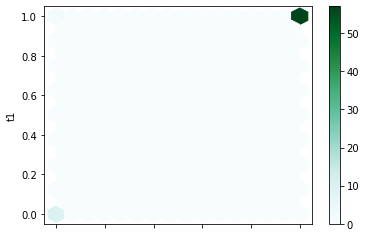

In [116]:
data_clean.plot.hexbin(x = "flair", y  = "t1", gridsize = 15)

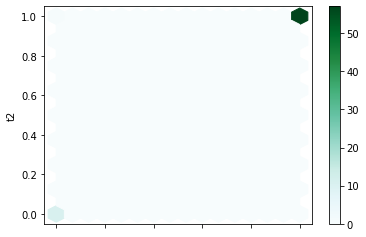

In [117]:
data_clean.plot.hexbin(x = "flair", y  = "t2", gridsize = 15)

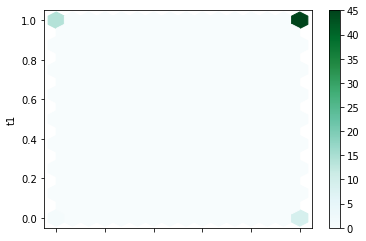

In [118]:
data_clean.plot.hexbin(x = "t1ce", y  = "t1", gridsize = 15)

In [138]:
only_flair_t1_t2 = data_clean[(data_clean["t1ce"] == 0) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

In [155]:
only_flair_t1_t2[0]

14

In [140]:
only_t1ce = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 0) & 
           (data_clean["flair"] == 0) & 
           (data_clean["t2"] == 0)].count()

In [154]:
only_t1ce[0]

9

In [153]:
only_t1_t1c = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 0) & 
           (data_clean["t2"] == 0)].count()
only_flair_t2[0]

2

In [150]:
all_have = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

In [151]:
all_have[0]

43

In [156]:
new_data = pd.DataFrame({"only_t1ce":only_t1ce[0], "all_have":all_have[0],"only_flair_t1_t2":only_flair_t1_t2[0],"only_t1_t1c":only_t1_t1c[0]}, index = [0])

In [157]:
new_data.head()

,only_t1ce,all_have,only_flair_t1_t2,only_t1_t1c
0,9,43,14,2


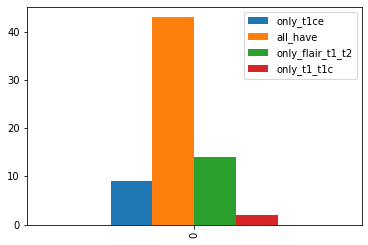

In [158]:
new_data.plot.bar()

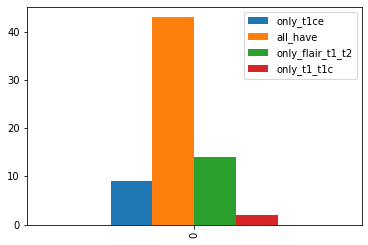

In [160]:
import matplotlib.pyplot as plt
new_data.plot.bar()
plt.savefig(os.path.abspath("modalities.png"))

In [3]:
output = "/home/alisher/Documents/data/umc/test/output.nii.gz"


In [33]:
import nibabel as nib
import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

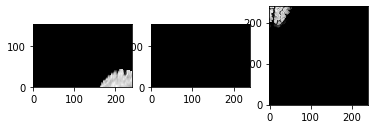

In [13]:
n_registered = nib.load(output).get_fdata()
slice_0 = n_registered[26, :, :]
slice_1 = n_registered[:, 12, :]
slice_2 = n_registered[:, :, 34]
show_slices([slice_0, slice_1, slice_2])

In [81]:
import nibabel as nib
import numpy as np
import os 
import tables

In [82]:
path = '/home/alisher/Desktop/prep/MRI-image-preprocessing/data/data_mew.h5'
cur_path = '/home/alisher/Desktop/'
index = 0

In [137]:
data_file = tables.open_file(path, 'r')
true = data_file.root.true
data = data_file.root.data
# array of 4 * volume of the image
first_true = true[0][0]
find_index = first_true > 0 
print(data.shape, true.shape)

(259, 4, 80, 96, 64) (259, 1, 80, 96, 64)


In [135]:
true = nib.Nifti1Image(true[2][0], affine = np.eye(4))
nib.save(true, f'{cur_path}/true0.nii.gz')

In [136]:
for index in range(4):
    image = nib.Nifti1Image(data[2][index], affine = np.eye(4))
    nib.save(image, f'{cur_path}/test{index}.nii.gz')

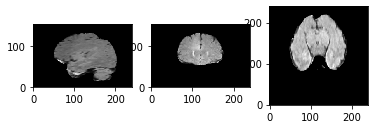

In [90]:
path_origin = "/home/alisher/Documents/data/brats/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_2_1/Brats18_2013_2_1_flair.nii.gz"
image_before_normalization = nib.load(path_origin).get_fdata()
slice_0 = image_before_normalization[80,:,:]
slice_1 = image_before_normalization[:,80,:]
slice_2 = image_before_normalization[:,:,50]
show_slices([slice_0, slice_1, slice_2])


In [55]:
mean = image_before_normalization.mean(axis=(0, 1, 2))
std = image_before_normalization.std(axis=(0, 1, 2))
image_after_normalization = image_before_normalization - mean 
image_after_normalization /= std

In [56]:
# image_after_normalization = nib.Nifti1Image(image_after_normalization, affine = np.eye(4))
# nib.save(image_after_normalization, f'{cur_path}/after.nii.gz')

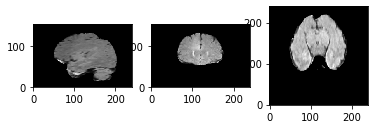

In [57]:
slice_0 = image_after_normalization[80,:,:]
slice_1 = image_after_normalization[:,80,:]
slice_2 = image_after_normalization[:,:,50]
show_slices([slice_0, slice_1, slice_2])

In [143]:
from scipy.ndimage import zoom 

def preprocess(img, out_shape=None):
    """
    Preprocess the image.
    Just an example, you can add more preprocessing steps if you wish to.
    """
    if out_shape is not None:
        img = resize(img, out_shape, mode='constant')
    
    # Normalize the image
    mean = img.mean()
    std = img.std()
    return (img - mean) / std


def preprocess_label(img, out_shape=None, mode='nearest'):
    """
    Separates out the 3 labels from the segmentation provided, namely:
    GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2))
    and the necrotic and non-enhancing tumor core (NCR/NET — label 1)
    """
    ncr = img == 1  # Necrotic and Non-Enhancing Tumor (NCR/NET)
    ed = img == 2  # Peritumoral Edema (ED)
    et = img == 4  # GD-enhancing Tumor (ET)
    
    if out_shape is not None:
        ncr = resize(ncr, out_shape, mode=mode)
        ed = resize(ed, out_shape, mode=mode)
        et = resize(et, out_shape, mode=mode)

    return np.array([ncr, ed, et], dtype=np.uint8)
def resize(img, shape, mode='constant', orig_shape=(155, 240, 240)):
    """
    Wrapper for scipy.ndimage.zoom suited for MRI images.
    """
    assert len(shape) == 3, "Can not have more than 3 dimensions"
    factors = (
        shape[0]/orig_shape[0],
        shape[1]/orig_shape[1], 
        shape[2]/orig_shape[2]
    )
    
    # Resize to the given shape
    return zoom(img, factors, mode=mode)


path = "/home/alisher/Documents/data/brats/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1"
input_shape = (4,80,96,64)
seqs = ["flair","t1","t2","t1ce","seg"]
data_paths = [{}]
for name in os.listdir(path):
    for seq in seqs: 
        if seq in name: 
            data_paths[0][seq] = f"{path}/{name}"
            break 

output_channels = 3

data = np.empty((len(data_paths[:4]),) + input_shape, dtype=np.float32)
labels = np.empty((len(data_paths[:4]), output_channels) + input_shape[1:], dtype=np.uint8)


In [144]:
print(data.shape)
print(labels.shape)

(1, 4, 80, 96, 64)
(1, 3, 80, 96, 64)


In [140]:
some = [labels, data]

(2,)